<a href="https://colab.research.google.com/github/evillag/xtol_m5/blob/master/EDA_M5T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Prepare and Explore the Data**
## **Data Science with Python (XTOL - Cenfotec)**
## *Author: Esteban  Villalobos*
## *March 5$^{th}$, 2020*


## Dataset description:
The dataset loaded contains labeled records of Taiwan customers' payment habits over a period of 6 months.

**Source**: *Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*

### **Attribute Information**
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX:
 - 1 = male
 - 2 = female

- EDUCATION: 
 - 1 = graduate school
 - 2 = university
 - 3 = high school
 - 0, 4, 5, 6 = others
- MARRIAGE: 
 - 1 = married
 - 2 = single
 - 3 = divorce
 - 0 =others
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
>
 - PAY_0 = the repayment status in September, 2005
 - PAY_2 = the repayment status in August, 2005
 - . . .
 - PAY_6 = the repayment status in April, 2005.
 
> The measurement scale for the repayment status is:
- -2: No consumption
- -1: Paid in full
- 0: The use of revolving credit
- 1 = payment delay for one month
- 2 = payment delay for two months
- . . .
- 8 = payment delay for eight months
- 9 = payment delay for nine months and above
 
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar):
 - BILL_AMT1 = amount of bill statement in September, 2005
 - BILL_AMT2 = amount of bill statement in August, 2005
 - . . .
 - BILL_AMT6 = amount of bill statement in April, 2005

- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar):
 - PAY_AMT1 = amount paid in September, 2005
 - PAY_AMT2 = amount paid in August, 2005
 - . . .
 - PAY_AMT6 = amount paid in April, 2005

- LABEL = *default payment next month*: client's behavior:
 - 0 = then not default
 - 1 = then default

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1, index_col=0)
credit = credit.rename(columns={
    'default payment next month': 'LABEL'
})
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LABEL
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
credit.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
LABEL        30000 non-null int64
dtypes: int64(24)
memory usage: 5.7 MB


In [4]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 
            'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
            'LABEL']:
    credit[col] = credit[col].astype('category')

credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
LABEL        30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [5]:
credit.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [6]:
credit.describe(include='category')

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LABEL
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10,2
top,2,2,2,0,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


Check if there are null values in the dataset.

In [7]:
credit.isna().describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LABEL
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000


Distribution of Loans limit balance

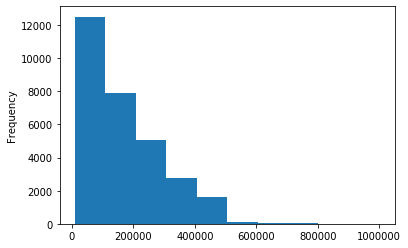

In [8]:
credit['LIMIT_BAL'].plot(kind='hist')

Distribution of data by quantiles:

In [12]:
credit['LIMIT_BAL_QUANTILE'] = pd.qcut(credit['LIMIT_BAL'], q=4, labels=False, precision=0)
credit['AGE_QUANTILE'] = pd.qcut(credit['AGE'], q=4, labels=False, precision=0)
credit[['AGE','AGE_QUANTILE', 'LIMIT_BAL', 'LIMIT_BAL_QUANTILE']].sample(15)

,AGE,AGE_QUANTILE,LIMIT_BAL,LIMIT_BAL_QUANTILE
ID,,,,
19142,43,3,4.848485,3
27447,33,1,0.808081,0
19393,31,1,8.080808,3
20125,36,2,1.414141,1
5942,30,1,0.404040,0
203,26,0,2.626263,1
22590,33,1,6.868687,3
15655,40,2,2.222222,1
15022,38,2,3.030303,2


Normalize dataframe

Only columns with monetary amounts will be normalized.

In [13]:
normalizable_df = credit[['LIMIT_BAL','BILL_AMT1','BILL_AMT2',
                               'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                               'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                               'PAY_AMT5','PAY_AMT6']]
cred_normalized=((normalizable_df-normalizable_df.min())/(normalizable_df.max()-normalizable_df.min()))*20

cred_normalized.sample(15)

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,
20089,7.272727,3.286249,1.589681,1.868973,3.416906,1.951066,5.639734,0.320393,0.153646,0.254007,0.549082,1.281835,0.535158
10484,2.020202,2.937286,1.420261,2.419037,3.828762,2.229181,5.604353,0.115620,0.748483,0.024552,0.035427,0.046890,0.037831
27440,2.828283,5.162328,3.770248,3.170061,5.702845,4.172790,7.325153,0.144239,0.072435,0.109370,0.000000,0.478279,0.192938
20326,1.414141,4.342942,1.885019,2.043909,3.674672,2.086554,5.583343,0.036632,0.017978,0.033592,0.032367,0.094999,0.075662
10764,4.040404,2.930383,1.324409,1.726892,3.202755,1.612962,5.219574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3495,1.818182,4.673588,3.242416,2.808538,5.066928,2.575813,5.981063,0.114475,0.000000,0.087050,0.058003,0.084402,0.075662
27204,5.454545,2.927003,1.320783,1.788517,3.333070,1.816173,5.401274,0.000000,0.072435,0.089282,0.112721,0.117225,0.075662
28328,2.020202,2.944117,1.339138,1.735413,3.217375,1.628351,5.233807,0.017767,0.009215,0.017321,0.024992,0.043420,0.029357
17798,0.808081,2.962045,1.405057,1.771233,3.302135,1.612962,5.219574,0.057238,0.000000,0.033481,0.000000,0.000000,0.000000


Overwrite original columns with normalize data

In [14]:
credit[['LIMIT_BAL','BILL_AMT1','BILL_AMT2',
        'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
        'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
        'PAY_AMT5','PAY_AMT6']] = cred_normalized

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LABEL,LIMIT_BAL_QUANTILE,AGE_QUANTILE
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
3959,0.808081,2,1,2,42,0,0,2,2,2,2,3.559342,2.050340,2.136829,3.950730,2.385035,5.861564,0.082422,0.000000,0.066961,0.000000,0.164115,0.128134,1,0,3
15010,0.808081,1,2,2,42,1,2,0,0,0,0,3.833797,2.234034,2.265536,4.146739,1.965087,5.497335,0.000000,0.026124,0.048659,0.032206,0.046890,0.030265,0,0,3
25421,0.202020,2,2,2,27,2,2,-2,-2,-1,-1,3.236748,1.324409,1.726892,3.202755,1.704166,5.293026,0.000000,0.000000,0.000000,0.148116,0.032823,0.000000,1,0,0
27709,0.404040,2,2,2,25,0,0,0,0,0,0,3.302389,1.726930,1.961915,3.599784,2.035151,5.548869,0.045790,0.023749,0.033481,0.064412,0.046890,0.037831,1,0,0
28736,9.898990,2,1,2,31,0,0,0,0,0,0,3.765307,2.386316,2.353371,4.371780,3.005082,6.340390,0.228950,0.035624,0.133923,0.322061,0.468901,0.163165,0,3,1
20642,3.636364,1,2,2,28,0,0,0,0,0,0,9.288809,8.208289,3.496928,5.523867,3.308739,6.506074,0.237353,0.078325,0.107830,0.090370,0.134575,0.378954,0,2,0
14294,3.030303,2,2,1,47,1,-2,-2,-2,-2,-2,2.930383,1.324409,1.726892,3.202755,1.612962,5.219574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2,3
11081,7.070707,1,1,2,31,-1,-1,-1,-2,-1,-1,2.939392,1.350032,1.726892,3.202755,1.646933,5.293641,0.031206,0.000000,0.000000,0.055169,0.225964,0.243594,1,3,1
17176,3.434343,2,1,2,29,-1,-1,-1,-1,-1,-1,3.097060,1.307383,1.752488,3.270503,1.674935,5.261103,0.000000,0.059706,0.143096,0.101610,0.126697,0.412699,0,2,1


Save to new csv file.

In [0]:
credit.to_csv('normalized_credit_df.csv')

Exploratory Data Analysis

In [17]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LABEL',
       'LIMIT_BAL_QUANTILE', 'AGE_QUANTILE'],
      dtype='object')


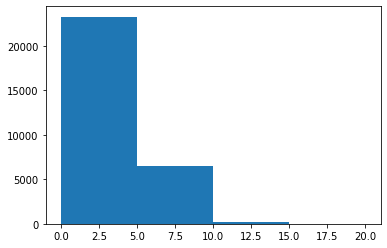

In [19]:
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.show()

Line Plots

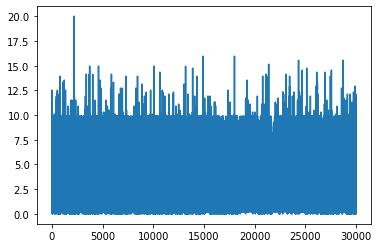

In [20]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

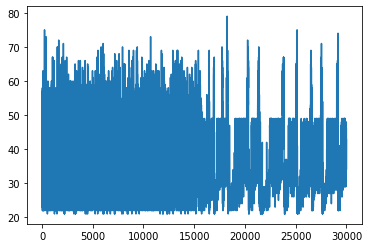

In [26]:
plt.plot(credit[['AGE']])
plt.show()

Scatter plots

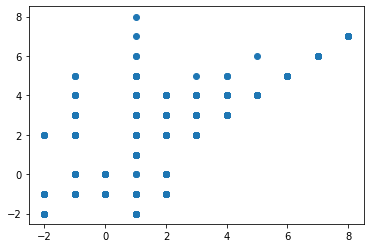

In [27]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

 Box Plots

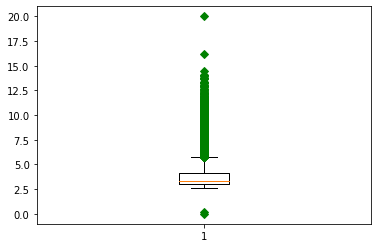

In [28]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

Correlation matrix

In [29]:
corrMat = credit.corr()
print(corrMat)

                    LIMIT_BAL       AGE  ...  LIMIT_BAL_QUANTILE  AGE_QUANTILE
LIMIT_BAL            1.000000  0.144713  ...            0.908324      0.165363
AGE                  0.144713  1.000000  ...            0.130200      0.927314
BILL_AMT1            0.285430  0.056239  ...            0.267842      0.054064
BILL_AMT2            0.278314  0.054283  ...            0.261505      0.052472
BILL_AMT3            0.283236  0.053710  ...            0.263248      0.051520
BILL_AMT4            0.293988  0.051353  ...            0.271807      0.049574
BILL_AMT5            0.295562  0.049345  ...            0.274127      0.048227
BILL_AMT6            0.290389  0.047613  ...            0.268491      0.046494
PAY_AMT1             0.195236  0.026147  ...            0.177247      0.031465
PAY_AMT2             0.178408  0.021785  ...            0.150264      0.030099
PAY_AMT3             0.210167  0.029247  ...            0.176818      0.034151
PAY_AMT4             0.203242  0.021379  ...        

Covariance

In [30]:
covMat = credit.cov()
print(covMat)

                    LIMIT_BAL        AGE  ...  LIMIT_BAL_QUANTILE  AGE_QUANTILE
LIMIT_BAL            6.870505   3.496499  ...            2.642665      0.490223
AGE                  3.496499  84.969755  ...            1.332143      9.667614
BILL_AMT1            0.974989   0.675573  ...            0.387429      0.079685
BILL_AMT2            0.985507   0.675968  ...            0.392118      0.080172
BILL_AMT3            0.565355   0.377019  ...            0.222511      0.044372
BILL_AMT4            0.933966   0.573729  ...            0.365658      0.067956
BILL_AMT5            0.934068   0.548417  ...            0.366854      0.065763
BILL_AMT6            0.696706   0.401726  ...            0.272780      0.048132
PAY_AMT1             0.194063   0.091398  ...            0.074606      0.013495
PAY_AMT2             0.127947   0.054942  ...            0.045633      0.009314
PAY_AMT3             0.216494   0.105951  ...            0.077130      0.015179
PAY_AMT4             0.268788   0.099431